## Verify theta and tau are correct

In [1]:
import toytree
import ipcoal
import msprime as ms
import numpy as np

In [2]:
print(toytree.__version__)
print(ipcoal.__version__)
print(ms.__version__)

2.1.0-dev
0.3.1
1.0.1


In [13]:
tree = toytree.rtree.unittree(6, treeheight=1e6, seed=333)
tree = tree.set_node_values("Ne", {2: 5e5, 1: 5e5, 0: 5e5}, 1e4)
tree = tree.mod.set_node_heights({4: 100000})
tree.draw(ts='p', admixture_edges=(0, 3, 0.5));

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="260.0px" viewBox="0 0 350.0 260.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tfbe5d49b6fc14526acbff233eadb275f"> 0 1 2 3 4 5 6 7 8 9 10 r0 r1 r2 r3 r4 r5 0 500000 1000000

In [20]:
mod = ipcoal.Model(tree=tree, admixture_edges=[(0, 4, (100001, 100002), 0.1)])
#mod.debug_demography()

In [21]:
mod.sim_loci(1, 10)

In [3]:
# tree = toytree.tree("((A:2,B:2):2,(C:1,D:1):3):1;")
# tree = tree.mod.node_scale_root_height(5e6)
# tree = tree.set_node_values("Ne", {"A": 1e5, "B": 1e6}, default=1e6)

In [4]:
# tree = toytree.rtree.bdtree(ntips = 10, seed=333)
# tree = tree.mod.node_scale_root_height(5e6)
# tree = tree.set_node_values("Ne", default=5e5)
# tree.write("/tmp/test.nwk", tree_format=5)

In [5]:
tree = toytree.rtree.bdtree(ntips=12, seed=333)
tree = tree.mod.node_scale_root_height(5e6)
#tree = tree.mod.set_node_heights({7: 3e6, 6: 2e6, 5: 1e6})
tree.write("/tmp/test.nwk", tree_format=5)

In [6]:
tree.draw(ts='p', scalebar=True);#, admixture_edges=[(1, 2), (4, 2)]);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="265.0px" viewBox="0 0 350.0 265.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1cb7343975e84703934066e928176b2d"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 0 2500000 5000000

### Sim for parameter check

In [7]:
mod = ipcoal.Model(
    tree=tree, 
    nsamples=8,
    Ne=5e5,
    mut=2.5e-9,
    recomb=1e-9,
    seed_mutations=10,
    seed_trees=12,
)

In [8]:
ts = next(mod.get_tree_sequence_generator(nsites=2e6))
mts = ms.sim_mutations(ts, rate=2.5e-9, model="jc69")

### True parameters
theta (diversity) is 0.005 and tau (divergence) from root to tips is 0.015.

In [9]:
mts.diversity(range(8))

array(0.00486029)

In [10]:
mts.divergence([range(8, 16), range(24, 30)], mode="site") / 2

0.014733218749998863

### Sim for testing in BPP

In [11]:
tree.get_node_values("height")

array([5.00000000e+06, 2.35377164e+06, 3.21683251e+06, 1.98099582e+06,
       1.47372567e+06, 1.35904610e+06, 1.19501776e+06, 7.87670482e+05,
       2.34870424e+05, 1.52724321e+05, 2.19907509e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.31322575e-10, 9.31322575e-10,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [29]:
tree = toytree.rtree.baltree(ntips=16).mod.node_scale_root_height(8e6)
tree.draw(ts='p')

mod = ipcoal.Model(tree=tree, Ne=1e6, nsamples=2)
mod.sim_loci(1000, 300)
mod.write_concat_to_phylip("test", outdir="/tmp", diploid=True)

wrote concat locus (16 x 300000bp) to /tmp/test.phy


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="265.0px" viewBox="0 0 350.0 265.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t89aa6f1de1d2469ebf9203f3b20ccdcf"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 4000000 8000000

In [30]:
import ipyrad.analysis as ipa

rax = ipa.raxml(data="/tmp/test.phy", name="test", workdir="/tmp", T=8, N=10)
print(rax.command)
rax.run(force=True)

/home/deren/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 8 -m GTRGAMMA -n test -w /tmp -s /tmp/test.phy -p 54321 -N 10 -x 12345
job test finished successfully


In [47]:
-1 * np.linspace(0, -1, 4)

array([-0.        ,  0.33333333,  0.66666667,  1.        ])

In [26]:
import toytree
import toyplot
import numpy as np
tre = toytree.tree("/tmp/RAxML_bipartitions.test")#.root(regex='r[0-5]$')
c, a, m = tre.draw(tip_labels_align=True, scalebar=True);
a.x.ticks.locator = toyplot.locator.Explicit(np.linspace(0, -0.15, 5))

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="265.0px" height="288.0px" viewBox="0 0 265.0 288.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7fe875d033da498083a8fa1fab8584ef"> r1 r10 r11 r9 r8 r13 r12 r15 r14 r6 r7 r4 r5 r3 r2 r0 0 -0.0375 -0.075 -0.1125 -0.15

In [67]:
min([1, 2, 3])

1

In [60]:
job = superbpp.load_project("/tmp/qtest.json")
mcmc = superbpp.analysis.mcmc.SuperMcmc(job)

mcmcfile = "/tmp/qtest_tmpfiles/node_30_rep_1.mcmc.txt"
df = mcmc.get_mcmc_tau_columns_from_mcmcfile(mcmcfile)
df = df.mean(axis=0)
ess = mcmc.get_all_tau_ess(mcmcfile)
heights = {i: df[i] for i in df.index}
tree = toytree.tree(job.tree)
tree = tree.mod.set_node_heights(heights)
tree.draw(ts='p');
df

30    0.007752
29    0.005968
27    0.003653
23    0.001999
22    0.001947
26    0.003870
21    0.002100
20    0.002126
28    0.005776
25    0.004098
19    0.001928
18    0.002059
24    0.003829
17    0.001931
16    0.001966
dtype: float64

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="265.0px" viewBox="0 0 350.0 265.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5c71c2f097024685a8e7ec6729be63ce"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0.000 0.004 0.008

In [22]:
mutmod = ms.GTR(
    [0.2, 0.3, 0.2, 1, 0.5, 1],
    equilibrium_frequencies=[0.2, 0.3, 0.3, 0.2],
)
mod = ipcoal.Model(Ne=1000)
mod.sim_loci(2, 20)

mutmod.transition_matrix

array([[0.66071429, 0.10714286, 0.16071429, 0.07142857],
       [0.07142857, 0.21428571, 0.53571429, 0.17857143],
       [0.10714286, 0.53571429, 0.        , 0.35714286],
       [0.07142857, 0.26785714, 0.53571429, 0.125     ]])

In [150]:
mutmod.root_distribution

array([0.2, 0.3, 0.3, 0.2])

In [130]:
tre = toytree.tree("(((___r13,___r12),___r11),((___r2,___r1),___r4));")
tre.draw(ts='s', node_labels=True);

bidx = tre.ntips + 1
for node in tre.treenode.traverse('preorder'):
    if node.is_leaf():
        node.bidx = node.idx
    else:
        node.bidx = bidx
        bidx += 1
        
tre.draw(ts='s', node_labels=tre.get_node_values("bidx"));

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="280.0px" height="275.0px" viewBox="0 0 280.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7ce1dfd186a54b3cabd0241dfa108e97"> 0 1 2 3 4 5 6 7 8 9 10 ___r4 ___r1 ___r2 ___r11 ___r12 ___r13

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="280.0px" height="275.0px" viewBox="0 0 280.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc21af950c704420a9c84a6cf37101f20"> 0 1 2 3 4 5 11 9 10 8 7 ___r4 ___r1 ___r2 ___r11 ___r12 ___r13

### Simulate BPP data

### Calculate stats on msprime data

In [55]:
0.05 / 4   # tau

0.0125

In [64]:
0.02 / 4   # theta

0.005

In [65]:
# 4Neu
4 * 5e5 * 2.5e-9

0.005

In [82]:
# Tg * mu
5e6 * 2.5e-9 

0.0125

### Calculate stats on BPP data

In [ ]:
# theta
hets = []
with open(UNPHASED_BPP, 'r') as indat:
    data = indat.readlines()
    for pop in range(1, 5):
        for samp in range(1, 5):
            nbases = 0
            nhetero = 0
            for line in data:
                if line.startswith(f"r{pop}{samp}^r{pop}"):
                    seq = line.split()[-1]
                    nhetero += sum(seq.count(i) for i in "RSKWMY")
                    nbases += len(seq)
            print(f"r{pop}-{samp}: {nhetero / nbases}")
            hets.append(nhetero/nbases)
print(f'mean = {sum(hets) / len(hets)}')


In [ ]:
# theta
hets = []
with open(UNPHASED_IP, 'r') as indat:
    data = indat.readlines()
    for pop in range(4):
        for samp in range(4):
            nbases = 0
            nhetero = 0
            for line in data:
                if line.startswith(f"^r{pop}_{samp}"):
                    seq = line.split()[-1]
                    nhetero += sum(seq.count(i) for i in "RSKWMY")
                    nbases += len(seq)
            print(f"r{pop}_{samp}: {nhetero / nbases}")
            hets.append(nhetero/nbases)
print(f'mean = {sum(hets) / len(hets)}')


In [23]:
import scipy.stats as stats

In [28]:
stats.gamma(a=1, scale=1).std()

1.0

In [18]:
mod.draw_genealogy(scalebar=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="270.0px" viewBox="0 0 1000.0 270.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="taff07f977da54d9f9c6d2904cc88e0fc"> r0_6 r0_1 r0_4 r0_3 r0_0 r0_2 r1_5 r1_0 r1_4 r1_1 r0_5 r2_3 r2_1 r0_7 r1_2 r2_4 r2_0 r1_6 r1_3 r1_7 r2_6 r2_5 r2_2 r2_7 r4_7 r4_2 r4_3 r4_4 r4_6 r4_5 r4_1 r4_0 r3_6 r3_3 r3_4 r3_1 r3_7 r3_0 r3_2 r3_5 r5_5 r5_3 r5_7 r5_6 r5_4 r5_2 r5_1 r5_0 r6_2 r6_0 r6_3 r6_5 r6_1 r6_4 r6_7 r6_6 r9_4 r9_2 r9_3 r9_0 r9_6 r9_1 r9_7 r9_5 r8_4 r8_0 r8_5 r8_3 r8_7 r8_1 r8_6 r8_2 r7_6 r7_5 r7_0 r7_7 r7_1 r7_4 r7_2 r7_3 0 3872785 7745569

In [398]:
mod.new_sim_trees(nloci=2, nsites=100)

In [399]:
mod.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,100,100,0,0,"(((A_2:71398,A_3:71398):..."
1,1,0,92,92,0,0,"((A_3:180814,(A_0:43098,..."
2,1,92,100,8,0,1,"((A_3:180814,(A_0:43098,..."


In [400]:
mod.draw_genealogy(idx=0);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="265.0px" viewBox="0 0 350.0 265.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t36b535b96d7c4236afd2addfa1c24ebc"> B_2 B_1 B_3 B_0 A_1 A_0 A_3 A_2 0 1951578 3903155

In [401]:
#ms.GTR()
ms.BinaryMutationModel()

In [61]:
x = ms.JC69()

In [84]:
x.root_distribution

array([0.25, 0.25, 0.25, 0.25])

In [83]:
np.random.choice(['a', 'b'], replace=True, size=10, p=[0.5, 0.5])

array(['b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b'], dtype='<U1')

In [67]:
x.root_distribution, x.alleles

(array([0.25, 0.25, 0.25, 0.25]), ['A', 'C', 'G', 'T'])

In [33]:
def get_one():
    msgen = mod.get_tree_sequence_generator(nsites=1000, )
    while 1:
        ts = next(msgen)
        mts = ms.sim_mutations(ts, rate=1e-8, model="JC69")

        if mts.num_mutations:
            #for var in mts.variants():
            #    print(var.site.position, var.alleles, var.genotypes, sep="\t")
            break
    return mts#.variants()

In [34]:
mts = get_one()

In [39]:
mts.genotype_matrix(alleles=tuple("ACGT"))

array([[2, 0, 2, ..., 2, 2, 2],
       [3, 3, 3, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 3, 3],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8)

In [89]:
x = np.zeros((2, 2, 2))

In [91]:
x[0, :, : ] = 2, 3

In [92]:
mts.genotype_matrix()

array([[[2., 3.],
        [2., 3.]],

       [[0., 0.],
        [0., 0.]]])

In [88]:
s.

{'id': 136, 'position': 999.0, 'ancestral_state': 'C', 'mutations': [{'id': 146, 'site': 136, 'node': 19, 'time': 4480129.368451165, 'derived_state': 'A', 'parent': -1, 'metadata': b''}], 'metadata': b''}

In [110]:
genos = mts.genotype_matrix(alleles=tuple("ACGT"))

In [109]:
genos[s.index]

array([1, 1, 1, 0, 0, 0, 0, 0], dtype=int8)

(137, 8)

In [117]:
for s in mts.variants():
    print(s.index, s.site.position, s.genotypes, genos[s.index])#['site'], s['genotypes'])

0 1.0 [0 1 0 0 0 0 0 0] [2 0 2 2 2 2 2 2]
1 8.0 [1 1 1 1 0 0 0 0] [3 3 3 3 0 0 0 0]
2 18.0 [0 0 1 0 0 0 0 0] [0 0 3 0 0 0 0 0]
3 20.0 [0 0 0 0 1 1 1 1] [1 1 1 1 2 2 2 2]
4 39.0 [1 1 1 1 0 0 0 0] [2 2 2 2 1 1 1 1]
5 45.0 [2 1 0 0 0 0 0 0] [0 3 1 1 1 1 1 1]
6 50.0 [1 1 1 1 0 0 0 0] [2 2 2 2 3 3 3 3]
7 77.0 [0 1 0 0 0 0 0 0] [1 0 1 1 1 1 1 1]
8 91.0 [0 0 0 0 0 1 0 0] [2 2 2 2 2 0 2 2]
9 92.0 [1 1 1 1 0 0 0 0] [2 2 2 2 0 0 0 0]
10 97.0 [0 1 0 0 0 0 0 0] [2 0 2 2 2 2 2 2]
11 102.0 [0 0 0 0 0 1 0 0] [2 2 2 2 2 1 2 2]
12 106.0 [1 0 1 1 0 0 0 0] [2 0 2 2 0 0 0 0]
13 107.0 [1 0 1 1 0 0 0 0] [3 0 3 3 0 0 0 0]
14 119.0 [0 1 0 0 0 0 0 0] [3 1 3 3 3 3 3 3]
15 123.0 [1 1 1 1 0 0 0 0] [0 0 0 0 1 1 1 1]
16 128.0 [1 1 1 1 0 0 0 0] [0 0 0 0 2 2 2 2]
17 131.0 [1 0 1 1 0 0 0 0] [0 2 0 0 2 2 2 2]
18 169.0 [1 1 1 1 0 0 0 0] [3 3 3 3 1 1 1 1]
19 176.0 [0 0 0 0 1 0 1 1] [0 0 0 0 2 0 2 2]
20 178.0 [0 1 0 0 0 0 0 0] [3 0 3 3 3 3 3 3]
21 187.0 [0 0 0 0 1 1 1 1] [1 1 1 1 3 3 3 3]
22 193.0 [0 0 0 0 1 1 1 1] [2 2 2

In [12]:
mts.allele_frequency_spectrum()

array([0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [419]:
mts.genotype_matrix()#alleles=("A", "C", "G", "T"))[0]#(alleles=("A", "A", "A", "T", "C", "G"))

array([[0, 0, 1, 0, 0, 0, 0, 0]], dtype=int8)

In [420]:
with open("/tmp/test.fa", 'w') as out:
    mts.write_fasta(out)

In [421]:
cat /tmp/test.fa

>tsk_0
A
>tsk_1
A
>tsk_2
T
>tsk_3
A
>tsk_4
A
>tsk_5
A
>tsk_6
A
>tsk_7
A


In [422]:
mts.num_mutations

1

In [378]:
for i in mts.haplotypes():
    print(i)

G
G
G
G
G
G
G
G


In [227]:
mts.tables.

id,position,ancestral_state,metadata
0,2.00000000,C,
1,6.00000000,T,
2,9.00000000,G,


In [123]:
#%%timeit 
var = get_one()

for i in var:
    print(i.site.position, i.alleles, i.genotypes)

0.0 ('G', 'C') [1 0 0 0 0 0 0 0]


In [97]:
msgen = mod.get_tree_sequence_generator(nsites=1, snp=True)
tree = next(msgen).first()
nwk = tree.newick(node_labels=mod.tipdict, precision=0)
gtree = toytree.tree(nwk, tree_format=5)
seq = mkseq.feed_tree(gtree, 1, mod.mut, mod.rng_muts.integers(0, 1e9))
np.all(seq == seq[0]), seq

(True,
 array([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]], dtype=int8))

In [92]:
msgen = mod.get_tree_sequence_generator(nsites=1, snp=True)
mkseq = ipcoal.markov.SeqModel.SeqModel(**mod.substitution_model)

def get_old():
    while 1:
        tree = next(msgen).first()
        nwk = tree.newick(node_labels=mod.tipdict, precision=0)
        gtree = toytree.rawtree(nwk, tree_format=5)
        seq = mkseq.feed_tree(gtree, 1, mod.mut, mod.rng_muts.integers(0, 1e9))
        
        if not np.all(seq == seq[0]):
            break
    return seq

In [93]:
%%timeit
get_old()

39.1 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
tree.newick(node_labels=dd)

'((AAAA:241718.12639431122807,B_1:241718.12639431122807):3090599.96642146026716,((B_3:304432.06356687046355,(A_0:57532.05613310323679,(A_1:4352.75565041174923,A_2:4352.75565041174923)A_3:53179.30048269148392):246900.00743376722676):2266137.15136037208140,(B_0:944818.76207360811532,B_2:944818.76207360811532):1625750.45285363448784):761748.87788852909580);'

In [53]:
dd = mod.tipdict.copy()
dd[0] = "AAAA"

In [51]:
mod.tipdict

{1: 'B_0',
 2: 'B_1',
 3: 'B_2',
 4: 'B_3',
 5: 'A_0',
 6: 'A_1',
 7: 'A_2',
 8: 'A_3'}

In [17]:
mod.ms_demography

Demography(populations=[Population(initial_size=100000.0, growth_rate=0, name='n3', description='A', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=1000000.0, growth_rate=0, name='n2', description='B', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=1000000.0, growth_rate=0, name='n1', description='C', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=1000000.0, growth_rate=0, name='n0', description='D', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=1000000.0, growth_rate=0, name='n2a', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=4), Population(initial_size=1000000.0, growth_rate=0, name='n0_n1', description='', extra_metadata={}, default_sampling_time=1250000.0, initially_active=False, id=5), Population(initial_size=1000000.0, growth_rate=0, name='n2aa', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=6), Population(initial_size=1000000.0, growth_rate=0, name='n2aa_n3', description='', extra_metadata={}, default_sampling_time=2500000.0, initially_active=False, id=7), Population(initial_size=1000000.0, growth_rate=0, name='n0_n1_n2aa_n3', description='', extra_metadata={}, default_sampling_time=5000000.0, initially_active=False, id=8)], events=[Admixture(time=625000.0, derived='n2', ancestral=['n1', 'n2a'], proportions=[0.04, 0.96]), PopulationSplit(time=1250000.0, derived=['n1', 'n0'], ancestral='n0_n1'), Admixture(time=1875000.0, derived='n2a', ancestral=['n0_n1', 'n2aa'], proportions=[0.04, 0.96]), PopulationSplit(time=2500000.0, derived=['n3', 'n2aa'], ancestral='n2aa_n3'), PopulationSplit(time=5000000.0, derived=['n2aa_n3', 'n0_n1'], ancestral='n0_n1_n2aa_n3')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [18]:
mod.new_sim_trees()
print(mod.df)
mod.draw_genealogy();

   locus  start  end  nbps  nsnps  tidx                    genealogy
0      0      0    1     1      0     0  ((B_3:80195.921545006320...


NewickError: Unexpected newick format A_3:56281.07808745263173

In [261]:
mod.nsamples

{'n3': 4, 'n2': 4}

In [11]:
mod.sampledict

In [12]:
mod.tipdict

In [12]:
mod.tree.get_mrca_idx_from_tip_labels("A")

3

In [10]:
mod.ms_demography

Demography(populations=[Population(initial_size=100, growth_rate=0, name='n3', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='n2', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='n1', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='n0', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='n2a', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='n0_n1', description='', extra_metadata={}, default_sampling_time=1.0, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='n2aa', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=6), Population(initial_size=100, growth_rate=0, name='n2aa_n3', description='', extra_metadata={}, default_sampling_time=2.0, initially_active=False, id=7), Population(initial_size=100, growth_rate=0, name='n0_n1_n2aa_n3', description='', extra_metadata={}, default_sampling_time=4.0, initially_active=False, id=8)], events=[Admixture(time=0.5, derived='n2', ancestral=['n1', 'n2a'], proportions=[0.04, 0.96]), PopulationSplit(time=1.0, derived=['n1', 'n0'], ancestral='n0_n1'), Admixture(time=1.5, derived='n2a', ancestral=['n0_n1', 'n2aa'], proportions=[0.04, 0.96]), PopulationSplit(time=2.0, derived=['n3', 'n2aa'], ancestral='n2aa_n3'), PopulationSplit(time=4.0, derived=['n2aa_n3', 'n0_n1'], ancestral='n0_n1_n2aa_n3')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

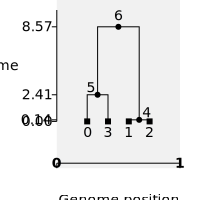

In [391]:
import msprime 
from IPython.display import SVG

xx = ms.Demography()
xx.add_population(name="A", initial_size=2)

ts = msprime.sim_ancestry(
    samples={"A": 2},
    demography=xx,
    #samples=[msprime.SampleSet(4, ploidy=1)],
    #population_size=2,
    ploidy=2,
    random_seed=1234
)
SVG(ts.draw_svg(y_axis=True))

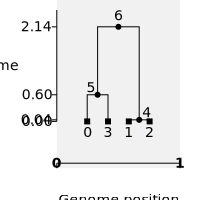

In [392]:
import msprime 
from IPython.display import SVG

ts = msprime.sim_ancestry(
    samples=[msprime.SampleSet(4, ploidy=1)],
    population_size=1,
    ploidy=1,
    random_seed=1234
)
SVG(ts.draw_svg(y_axis=True))

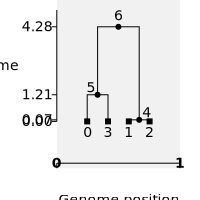

In [378]:
import msprime 
from IPython.display import SVG

ts = msprime.sim_ancestry(
    samples=[msprime.SampleSet(2, ploidy=2)],
    population_size=1,
    ploidy=2,
    random_seed=1234
)
SVG(ts.draw_svg(y_axis=True))

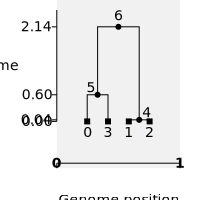

In [379]:
import msprime 
from IPython.display import SVG

ts = msprime.sim_ancestry(
    samples=[msprime.SampleSet(2, ploidy=2)],
    population_size=1,
    ploidy=1,
    random_seed=1234
)
SVG(ts.draw_svg(y_axis=True))

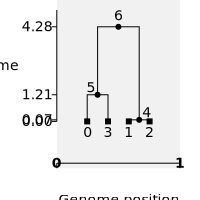

In [380]:
import msprime 
from IPython.display import SVG

ts = msprime.sim_ancestry(
    samples=[msprime.SampleSet(4, ploidy=1)],
    population_size=1,
    ploidy=2,
    random_seed=1234
)
SVG(ts.draw_svg(y_axis=True))

In [8]:
mod.new_sim_trees()

KeyError: "Population with name 'D' not found"

In [8]:
mod.ms_demography

Demography(populations=[Population(initial_size=100, growth_rate=0, name='n3', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='n2', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='n1', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='n0', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='n2a', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='n0_n1', description='', extra_metadata={}, default_sampling_time=1.0, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='n2aa', description='', extra_metadata={}, default_sampling_time=None, initially_active=False, id=6), Population(initial_size=100, growth_rate=0, name='n2aa_n3', description='', extra_metadata={}, default_sampling_time=2.0, initially_active=False, id=7), Population(initial_size=100, growth_rate=0, name='n0_n1_n2aa_n3', description='', extra_metadata={}, default_sampling_time=4.0, initially_active=False, id=8)], events=[Admixture(time=0.5, derived='n2', ancestral=['n1', 'n2a'], proportions=[0.04, 0.96]), PopulationSplit(time=1.0, derived=['n1', 'n0'], ancestral='n0_n1'), Admixture(time=1.5, derived='n2a', ancestral=['n0_n1', 'n2aa'], proportions=[0.04, 0.96]), PopulationSplit(time=2.0, derived=['n3', 'n2aa'], ancestral='n2aa_n3'), PopulationSplit(time=4.0, derived=['n2aa_n3', 'n0_n1'], ancestral='n0_n1_n2aa_n3')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [64]:
ts = ms.sim_ancestry(samples={0: 3, 1: 2, 2: 4}, sequence_length=100, recombination_rate=0.00001, demography=mod.ms_demography, num_replicates=1)

In [65]:
ts = next(ts)

In [76]:
breaks = list(ts.breakpoints())
breaks

[0.0, 30.0, 71.0, 100.0]

In [77]:
s = breaks[:len(breaks)-1]
e = breaks[1:len(breaks)]

[i - j for i,j in zip(e, s)]

[30.0, 41.0, 29.0]

In [ ]:
raise NotImplementedError("STOP")

In [38]:
rate_map = ms.RateMap.uniform(sequence_length=10, rate=0.1)

In [39]:
rate_map

left,right,mid,span,rate
0,10,5,10,0.10


In [81]:
for i in ts.trees():
    print(i.newick(), i.index)

(((15:53.52579192519498,((13:3.59956142427477,16:3.59956142427477):12.61775105333910,(9:4.24330344160094,17:4.24330344160094):11.97400903601293):37.30847944758111):133.01338276545317,(18:99.84217008104980,((7:8.66208034492636,8:8.66208034492636):45.82852802837498,(10:17.34479661710320,12:17.34479661710320):37.14581175619816):45.35156170774845):86.69700460959837):229.49840427286722,(3:273.90229493628414,(((2:3.04792411722881,(1:2.77478594196913,6:2.77478594196913):0.27313817525967):5.88763951177654,(4:5.37679772598298,5:5.37679772598298):3.55876590302236):15.69942084827215,(11:18.75011544397492,14:18.75011544397492):5.88486903330257):249.26731045900664):142.13528402723125); 0
(((15:53.52579192519498,((13:3.59956142427477,16:3.59956142427477):12.61775105333910,(9:4.24330344160094,17:4.24330344160094):11.97400903601293):37.30847944758111):133.01338276545317,(18:99.84217008104980,((7:8.66208034492636,8:8.66208034492636):45.82852802837498,(10:17.34479661710320,12:17.34479661710320):37.14581

In [90]:
i.index

-1

In [ ]:
#                z
#              /   \
#             y      x
#            / \    / \
#           A   B   x  C

In [ ]:
tree.draw(node_sizes=10, layout='d', scalebar=True, admixture_edges=[(3, 4), (16, 17)]);

In [ ]:
admix = [(3, 4, (500000, 500000), 0.1), (16, 17, (4500000, 4500000), 0.1)]
dtree = tree.copy()
demography = ms.Demography()


for idx, node in dtree.idx_dict.items():
    if not node.children:
        demography.add_population(name=f"n{idx}", initial_size=node.Ne)
    node.current = f"n{idx}"
    

events = []

# add split events
for idx, node in dtree.idx_dict.items():
    if node.children:
        events.append({
            'type': 'split',
            'time': node.height,
            'derived': [i.idx for i in node.children],
            'ancestral': str(node.current),
        })

# add admixture events.
for event in admix:
    src, dest, time, rate = event
    if time[0] == time[1]:            
        events.append({
            'type': 'admixture',
            'time': time[0],
            'ancestral': [src, dest],
            'proportions': [rate, 1 - rate],
        })
    else:
        events.append({
            'type': 'migration',
            'time': time,
            'ancestral': [src, dest],
            'proportions': [rate, 1 - rate],
        })                

# sort events by time then type
events.sort(key=lambda x: (x['time'], x['type']))


for event in events:
    print(event)
    
    if event['type'] == "split":
        node = dtree.idx_dict[int(event['ancestral'])]
        demography.add_population(
            name=f"n{node.current}",
            initial_size=node.Ne,
        )
        demography.add_population_split(
            time=node.height,
            derived=[str(i.current) for i in node.children],
            ancestral=str(node.current),
        )

    if event['type'] == "admixture":

        src, dest = dtree.idx_dict[int(event['ancestral'])]

        # set node current to newnode
        newname = f'{src.idx}x{dest.idx}'
        node = dtree.idx_dict[dest].current = newname

        # create new node that inherits its Ne from dest
        demography.add_population(
            name=f"n{newname}",
            initial_size=node.Ne,
        )

        # create new node ancestry
        demography.add_admixture(
            time=event['time'],
            derived=[dtree.idx_dict[i].current for i in (src, dest)],
            ancestral=f"n{newname}",
            proportions=[rate, 1 - rate],
        )


demography.sort_events()
demography.debug()

In [ ]:
ts = ms.sim_ancestry(
    samples={"A": 2, "B": 2, "C": 1},
    demography=demography,
)

In [ ]:
for tree in ts.trees():
    print(tree)

In [ ]:
demography.debug()

In [ ]:
from ipcoal.utils.utils import get_all_admix_edges

In [ ]:
get_all_admix_edges(tree, 0, 1)

In [ ]:
get_admix_interval_as_gens(tree, 0, 1, [4000, 5000], None)

In [ ]:
get_admix_interval_as_gens(tree, 0, 1, [None, None], [0.25, 0.75])

In [ ]:

def get_admix_interval_as_gens(
    tree, 
    idx0, 
    idx1, 
    heights=None,
    props=None,
    ):
    """
    Returns the branch interval in units of generations that two 
    edges of a tree are overlapping, with the lower and upper edges
    optionally trimmed. If user enters admix times as integers then 
    they are checked only for validation, no trimming.
    """
    if tree.idx_dict[idx0].is_root() or tree.idx_dict[idx1].is_root():
        raise IpcoalError(f"no shared admix interval for idxs: {idx0} {idx1}")

    # get full possible intervals for these two nodes from the tree
    node0 = tree.idx_dict[idx0]
    ival0 = (node0.height, node0.up.height)
    node1 = tree.idx_dict[idx1]
    ival1 = (node1.height, node1.up.height)

    low_bin = max([ival0[0], ival1[0]])
    top_bin = min([ival0[1], ival1[1]])
    if top_bin < low_bin:
        raise IpcoalError(f"no shared admix interval for idxs: {idx0} {idx1}")

    # if user entered a time in gens then check if it works
    if heights is not None:
        if not ((heights[0] >= low_bin) and (heights[1] <= top_bin)):
            raise IpcoalError(
                f"admix interval ({heights}) not within no shared admix interval for idxs: {idx0} {idx1}")
        return heights

    # restrict migration within bin to a smaller interval
    length = top_bin - low_bin
    low_limit = low_bin + (length * props[0])
    top_limit = low_bin + (length * props[1])
    return low_limit, top_limit


In [ ]:
tree.distance.get_mrca(0, 1).height

In [ ]:
mod = ipcoal.Model(tree=tree, Ne=5e5, nsamples=2, mut=2.5e-9, recomb=0)

In [ ]:
mod.sim_loci(1000, 100)

In [ ]:
xy = mod.get_pairwise_distances()

In [ ]:
np.mean([xy.loc[f"r{i}-0", f"r{i}-1"] for i in range(10)])

In [ ]:
for i in xy:
    print((xy.loc[i][xy.loc[i] != 0]).min())

In [ ]:
#mod.draw_seqview(0, 0, 50);

In [ ]:
#np.max(mod.get_pairwise_distances(model="") / 2).mean()

### Theta using msprime sim_mutations
this is the proportion of sites that are different between two randomly sampled alleles (e.g., heterozygosity in a sampled individual in a pop).

In [ ]:
mod = ipcoal.Model(tree=tree, Ne=5e5, nsamples=2, mut=2.5e-9, recomb=0, )

In [ ]:
mod.sim_trees()
mod.draw_genealogies()

In [ ]:
mod = ipcoal.Model(tree=tree, Ne=5e5, nsamples=2, mut=2.5e-9, recomb=1e-8)

In [ ]:
msgen = mod._get_tree_sequence_generator(nsites=100)
ts = next(msgen)

In [ ]:
ts.num_sites

In [ ]:
ms.sim_ancestry()

In [ ]:
list(ts.breakpoints())

In [ ]:
mod.sim_trees(1, 10)
mod.df

In [ ]:
        ts = ms.sim_ancestry(
            samples=2,
            population_size=500_000,
            sequence_length=200,
            recombination_rate=0.00000005,
        )

In [ ]:
list(ts.breakpoints())

In [ ]:
# 4 * Ne * mu
4 * 5e5 * 2.5e-9

In [ ]:
for i in range(10):
    
    div = []
    for i in range(10000):
        ts = ms.sim_ancestry(
            samples=2,
            population_size=500_000,
            sequence_length=200,
            recombination_rate=0.5,
            #random_seed=1234,  # only needed for repeatabilty
        )
        # Optionally add finite-site mutations to the ts using the Jukes & Cantor model, creating SNPs
        mutated_ts = ms.sim_mutations(ts, rate=2.5e-9)
        div.append(mutated_ts.diversity(sample_sets=[0, 1]))

    print(np.mean(div), np.std(div))

In [ ]:
div = []
for i in range(10000):
    ts = next(mod._get_tree_sequence_generator(nsites=200))
    mutated_ts = ms.sim_mutations(ts, rate=2.5e-9)  
    div.append(mutated_ts.diversity(sample_sets=[0, 1]))

print(np.mean(div), np.std(div))

In [ ]:
mutated_ts = ms.sim_mutations(ts, rate=1e-8)

In [ ]:
mutated_ts.diversity(sample_sets=[0, 1])

In [ ]:
muts = 0
for i in range(100):
    tsgen = mod._get_tree_sequence_generator(nsites=100)
    ts = next(tsgen)
    mutated_ts = ms.sim_mutations(ts, rate=2.5e-9)
    muts += (mutated_ts.num_mutations) 
    
print(muts / (100 * 100))

In [ ]:
mutated_ts.diversity([[0, 1], [2, 3]])

In [ ]:
mutated_ts.diversity([[0, 1]], windows=[10, 20])

In [ ]:
import tskit

In [ ]:
mutated_ts.divergence([[0, 1], [2, 3]])